## Faulted intrusion
In this example we model a synthetic intrusion that is faulted by a normal fault. To run this model you will need:
* LoopStructural
* matplotlib 
* lavavu

If you are on google colab or don't have them installed uncomment the following line

In [1]:
#!pip install matplotlib lavavu-osmesa LoopStructural

In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data, bb = load_intrusion()
images = []
resolution = (1024, 768)

In [3]:
camera = {'translation':[0.0, 0.0, -15107.612],'rotation':[73.248, -86.822, -13.913]}

In [4]:
rotation = [-73.24819946289062, -86.82220458984375, -13.912878036499023]

In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=1e4,
                                   steps=4,
#                                    step=10,
# #                                    interpolatortype='PLI',
# #                                    solver='pyamg',
# #                                    damp = True,
# #                                    buffer=0.5
                                  )

2021-08-21 08:28:47,945 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute
2021-08-21 08:28:47,945 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute


### Data and fault surface

lv.translation(0.0, 0.0, -12569.008)
lv.rotation(-73.248, -86.822, -13.913)



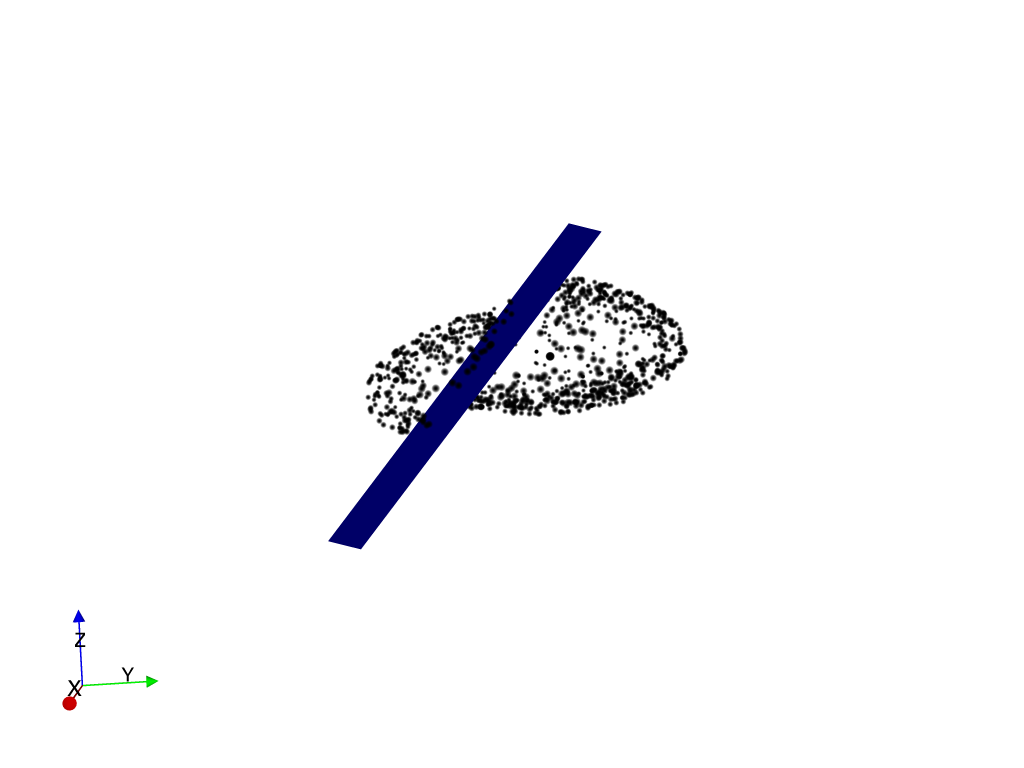

In [6]:
viewer = LavaVuModelViewer(model)
viewer.clear()
# viewer.add_section(None,axis='x',value=model.bounding_box[0,1],colour='white',name='x')

viewer.add_isosurface(fault[0],
                      isovalue=0,
                      colour='blue'
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['feature_name']=='strati'][['X','Y','Z']].to_numpy()
xyz = xyz[fault.evaluate(xyz),:]
# viewer.add_vector_field(fault, locations=xyz)
viewer.add_points(model.rescale(model.data[model.data['feature_name']=='strati'][['X','Y','Z']]),name='prefault',pointsize=6)
# viewer.interactive()
viewer.rotation = rotation
viewer.xmin = -1
viewer.ymin = -1
viewer.zmin = -1
viewer.xmax = 1
viewer.ymax = 1
viewer.zmax = 1
viewer.border = 0
# viewer.lv.translate(.10,.10,.10)
viewer.lv.camera(camera)

viewer.display()
images.append(viewer.image_array(resolution=resolution))#.image('0.png')

# viewer.add_points(,name='prefault',pointsize=6)
# viewer.interactive()

### fault surface and displacement vectors

lv.translation(0.0, 0.0, -12569.008)
lv.rotation(-73.248, -86.822, -13.913)



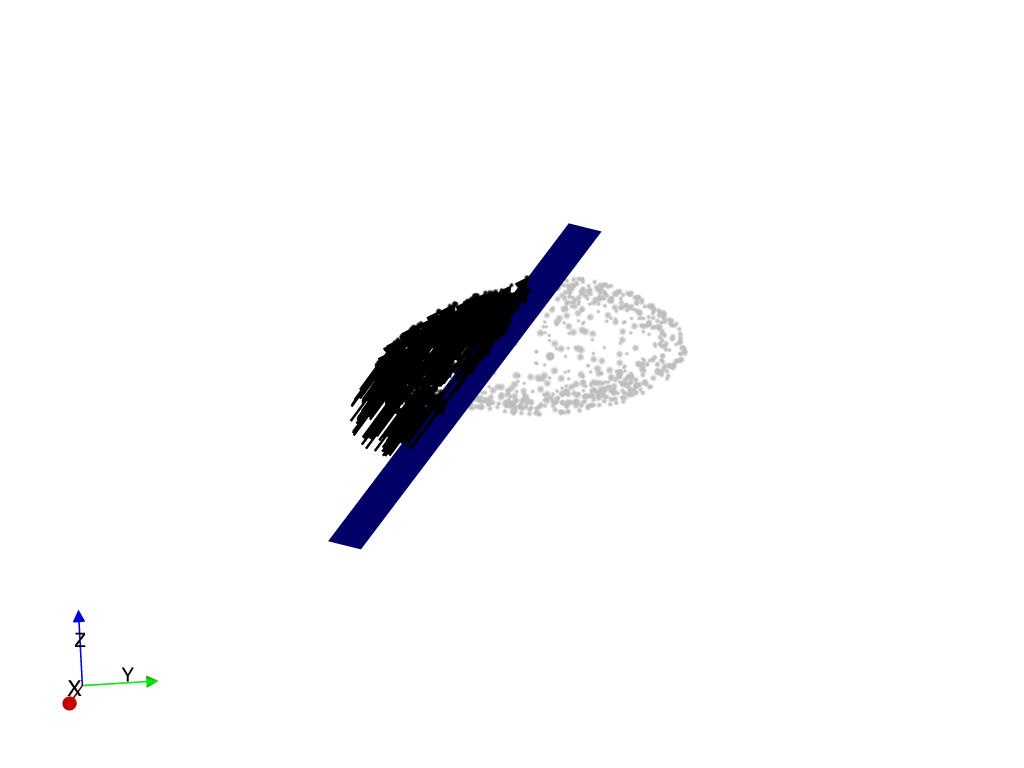

In [7]:
viewer.clear()# = LavaVuModelViewer(model)
# viewer.add_section(fault,axis='x',value=model.bounding_box[0,1],colour='white',name='test')

viewer.add_isosurface(fault,
                      isovalue=0,
                      colour='blue'
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['feature_name']=='strati'][['X','Y','Z']].to_numpy()
xyz = xyz[fault.evaluate(xyz),:]
viewer.add_vector_field(fault, locations=xyz)
xyz = model.data[model.data['feature_name']=='strati'][['X','Y','Z']].to_numpy()
v = fault[0].evaluate_value(xyz)
xyz = fault.apply_to_points(xyz)
viewer.add_points(model.rescale(xyz[fault.evaluate(xyz)]),name='faulted',pointsize=6)
viewer.add_points(model.rescale(xyz[~fault.evaluate(xyz)]),name='nfaulted',pointsize=6,colour='grey')

viewer.rotation = rotation
viewer.xmin = -1
viewer.ymin = -1
viewer.zmin = -1
viewer.xmax = 1
viewer.ymax = 1
viewer.zmax = 1
viewer.border = 0
viewer.lv.camera(camera)

viewer.display()
images.append(viewer.image_array(resolution=resolution))
# viewer.interactive()

### Faulted points

2021-08-21 08:34:04,460 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute
2021-08-21 08:34:04,460 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute


lv.translation(0.0, 0.0, -12859.49)
lv.rotation(-73.248, -86.822, -13.913)



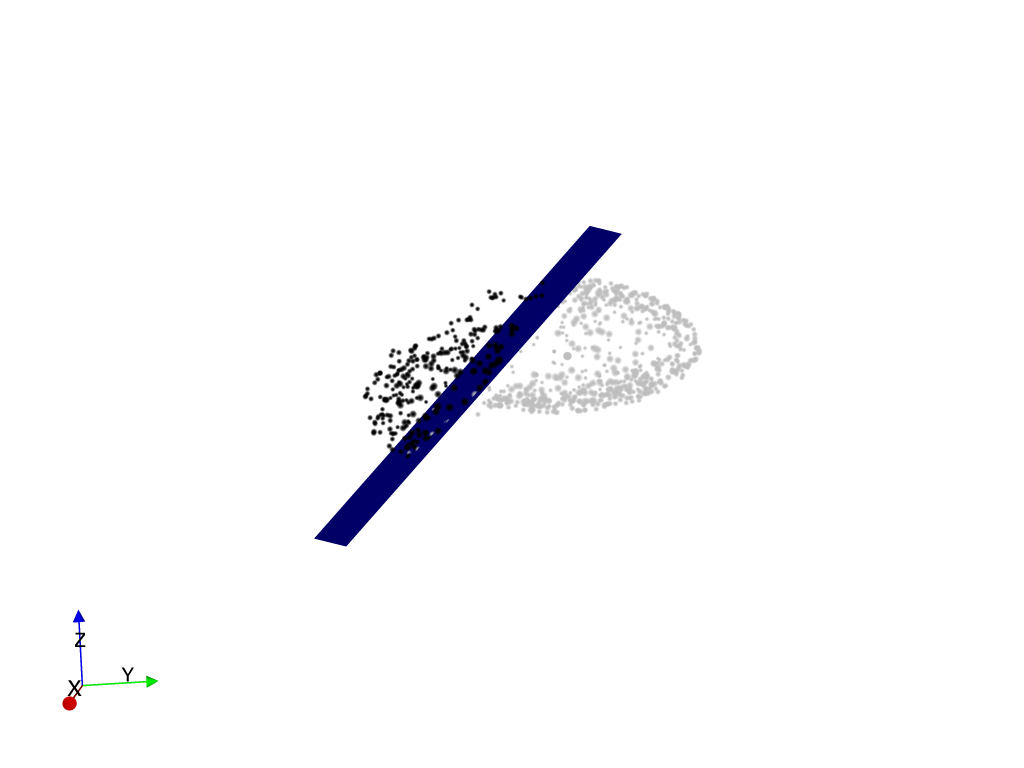

In [8]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)

fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=1e4,
                                   steps=4,
                                   interpolatortype='PLI',
                                   solver='pyamg',
                                   buffer=0.8)
viewer.clear()
viewer.model=model
# viewer.add_section(None,axis='x',value=model.bounding_box[0,1],colour='white')

viewer.add_isosurface(fault,
                      isovalue=0,
                      colour='blue'
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['feature_name']=='strati'][['X','Y','Z']].to_numpy()
xyz = fault.apply_to_points(xyz)
viewer.add_points(model.rescale(xyz[fault.evaluate(xyz)]),name='faulted',pointsize=6)
viewer.add_points(model.rescale(xyz[~fault.evaluate(xyz)]),name='nfaulted',pointsize=6,colour='grey')
viewer.rotation = rotation
viewer.xmin = -1
viewer.ymin = -1
viewer.zmin = -1
viewer.xmax = 1
viewer.ymax = 1
viewer.zmax = 1
viewer.border = 0
viewer.lv.camera(camera)

viewer.display()
images.append(viewer.image_array(resolution=resolution))
# viewer.interactive()

### Interpolated surface with fault

In [9]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=1e4,
                                   steps=4,
                                   step=10,
                                   interpolatortype='FDI',
                                  buffer=0.8)
strati = model.create_and_add_foliation('strati',nelements=3e4,interpolatortype='FDI',regularisation=0.5)
model.update()

2021-08-21 08:34:29,658 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute
2021-08-21 08:34:29,658 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute


  0%|          | 0/4 [00:00<?, ?it/s]

lv.translation(0.0, 0.0, -12578.796)
lv.rotation(-73.248, -86.822, -13.913)



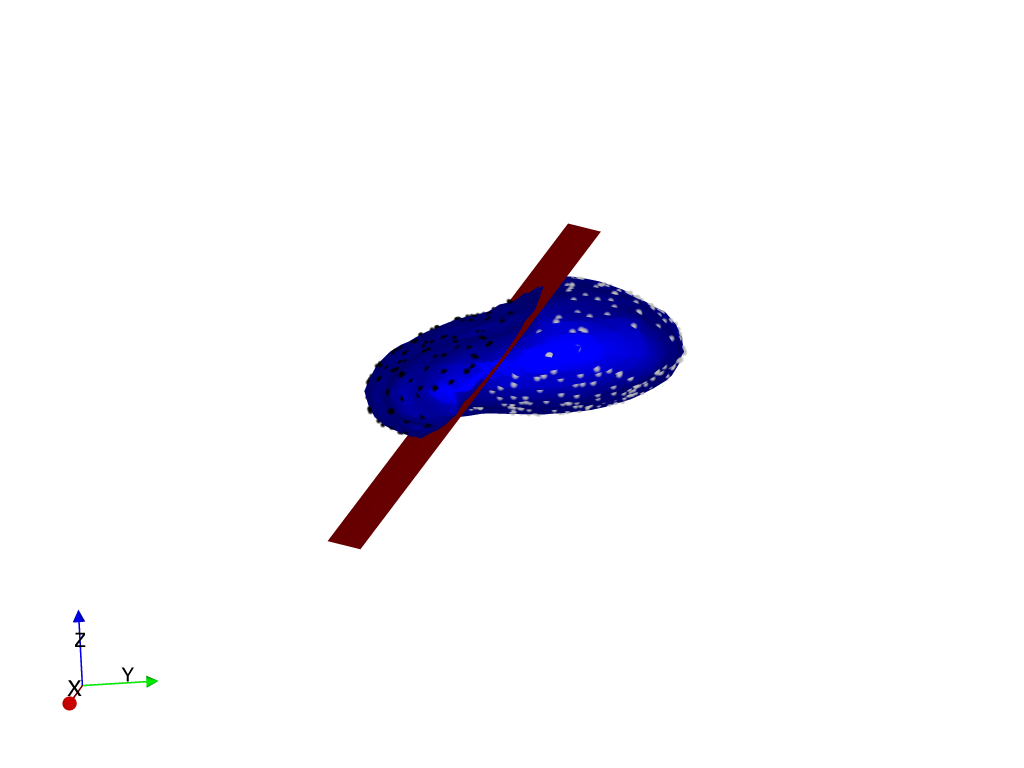

In [10]:
viewer.clear()# = LavaVuModelViewer(model)
viewer.model = model
# strati.faults = []

viewer.add_isosurface(strati,
                     isovalue=0,
                     colour='blue')
# viewer.add_data(model.features[0][0])
# viewer.add_data(strati)
viewer.add_isosurface(fault,
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['feature_name']=='strati'][['X','Y','Z']].to_numpy()
viewer.add_points(model.rescale(xyz[fault.evaluate(xyz)]),name='faulted',pointsize=6)
viewer.add_points(model.rescale(xyz[~fault.evaluate(xyz)]),name='nfaulted',pointsize=6,colour='grey')
viewer.rotation = rotation
viewer.xmin = -1
viewer.ymin = -1
viewer.zmin = -1
viewer.xmax = 1
viewer.ymax = 1
viewer.zmax = 1
viewer.border = 0
viewer.lv.camera(camera)

viewer.display()
images.append(viewer.image_array(resolution=resolution))

# viewer.add_points(,name='prefault',pointsize=6

lv.translation(0.0, 0.0, -12578.796)
lv.rotation(-73.248, -86.822, -13.913)



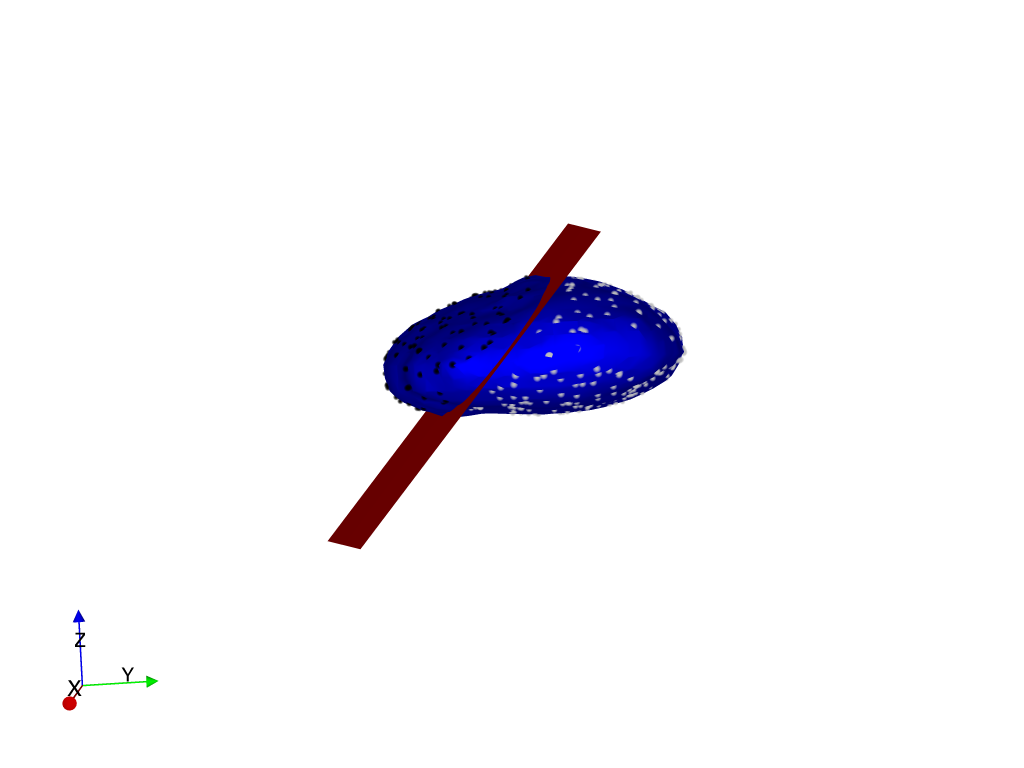

In [11]:
viewer.clear()# = LavaVuModelViewer(model)
strati.faults = []

viewer.add_isosurface(strati,
                     isovalue=0,
                     colour='blue')
# viewer.add_data(model.features[0][0])
# viewer.add_data(strati)
xyz = model.data[model.data['feature_name']=='strati'][['X','Y','Z']].to_numpy()
xyzc = xyz.copy()
xyz = fault.apply_to_points(xyz)
viewer.add_points(model.rescale(xyz[fault.evaluate(xyz)]),name='faulted',pointsize=6)
viewer.add_points(model.rescale(xyz[~fault.evaluate(xyz)]),name='nfaulted',pointsize=6,colour='grey')

viewer.add_isosurface(fault,
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
# viewer.add_points(model.data[model.data['feature_name']=='strati'][['X','Y','Z']],name='prefault')
# viewer.interactive()
viewer.rotation = rotation
viewer.xmin = -1
viewer.ymin = -1
viewer.zmin = -1
viewer.xmax = 1
viewer.ymax = 1
viewer.zmax = 1
viewer.border = 0
viewer.lv.camera(camera)
viewer.display()
images.append(viewer.image_array(resolution=resolution))

### Model nodes


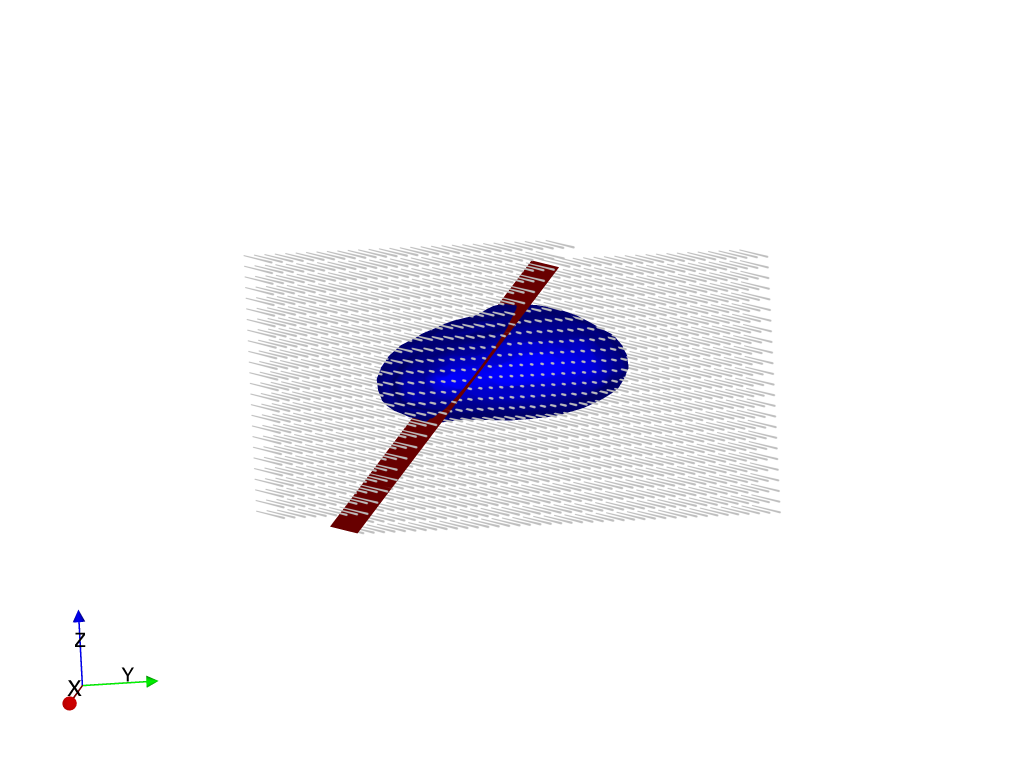

In [12]:
viewer.clear()# = LavaVuModelViewer(model)
viewer.add_isosurface(fault,
                      isovalue=0,
                     )
nodes = model.regular_grid()#fault2[0].get_interpolator().support.nodes
p1 = viewer.lv.points('nodes2',pointsize=2,colour='grey')
p1.vertices(model.rescale(nodes[~fault.evaluate(nodes),:]))
nodes = model.regular_grid()#fault2[0].get_interpolator().support.nodes
p1 = viewer.lv.points('nodes',pointsize=2,colour='grey')
p1.vertices(model.rescale(fault.apply_to_points(nodes[fault.evaluate(nodes),:])))
viewer.add_isosurface(strati,
                     isovalue=0,
                     colour='blue')
# nodes  = nodes[~np.logical_or(~fault.evaluate(nodes),
#                                 ~fault2.evaluate(nodes)),:]
# p = viewer.lv.points('nodes',pointsize=6,colour='black')
# p.vertices(nodes)
# nodes = fault1.apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2.apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1[1])#,model.regular_grid((25,25,12)))
viewer.rotation = rotation
viewer.xmin = -100
viewer.ymin = -100
viewer.zmin = -100
viewer.xmax = 100
viewer.ymax = 100
viewer.zmax = 100
viewer.border = 0
viewer.display()
viewer.interactive()
images.append(viewer.image_array(resolution=resolution))

## Combine all into one figure

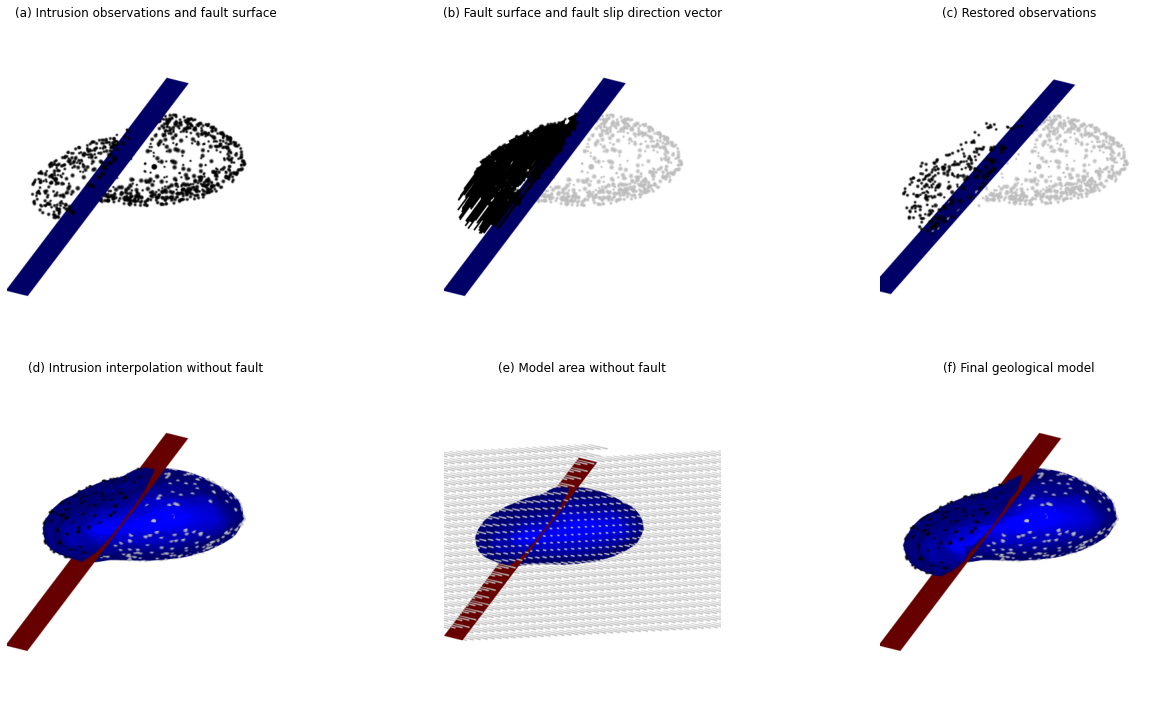

In [13]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(images[0][140:630, 330:744,:])
ax[0,0].set_title('(a) Intrusion observations and fault surface')
ax[0,1].imshow(images[1][140:630, 330:744,:])
ax[0,1].set_title('(b) Fault surface and fault slip direction vector')
ax[0,2].imshow(images[2][140:630, 330:744,:])
ax[0,2].set_title('(c) Restored observations')
ax[1,0].imshow(images[4][140:630, 330:744,:])
ax[1,0].set_title('(d) Intrusion interpolation without fault')
ax[1,1].imshow(images[5][140:630, 330:744,:])
ax[1,1].set_title('(e) Model area without fault')
ax[1,2].imshow(images[3][140:630, 330:744,:])
ax[1,2].set_title('(f) Final geological model')

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')
plt.tight_layout()


In [14]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=1e4,
                                   steps=4,
                                   interpolatortype='FDI',
                                  buffer=0.8)
strati = model.create_and_add_foliation('strati',nelements=3e4,interpolatortype='FDI',regularisation=0.1)
model.update()



2021-08-21 08:35:46,372 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute
2021-08-21 08:35:46,372 ~ LoopStructural.modelling.core.geological_model ~ WARNING    ~ Depreciated method. Model data can now be set using the data attribute


  0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
view = LavaVuModelViewer(model)
view.add_isosurface(model['fault'],0)
view.add_isosurface(model['strati'],0,colour='blue')
view.interactive()

In [17]:
view.export_to_webgl('faulted_intrusion')